<a href="https://colab.research.google.com/github/aravindskumar98/DL/blob/main/PyTorch_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [6]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1)

n_samples, n_features = X.shape

In [3]:
#1 design the model
#2 loss and optimizer
#3 training loop

In [7]:
# design model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [8]:
#loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)

epoch 10 loss =  502.3934326171875
epoch 20 loss =  456.4961242675781
epoch 30 loss =  423.03753662109375
epoch 40 loss =  398.6357421875
epoch 50 loss =  380.8309326171875
epoch 60 loss =  367.8345642089844
epoch 70 loss =  358.3448181152344
epoch 80 loss =  351.4130859375
epoch 90 loss =  346.3483581542969
epoch 100 loss =  342.64678955078125


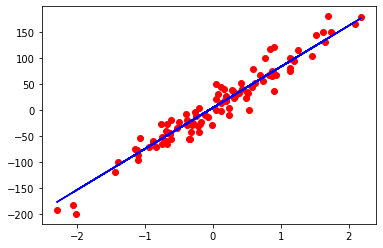

In [11]:
#training loop
n_epochs = 100
for epoch in range(n_epochs):
  #forward pass and loss
  y_pred = model(X)
  loss = criterion(y,y_pred)

  #backward pass
  loss.backward()

  #update
  optimizer.step()

  #empty gradients
  optimizer.zero_grad()

  if (epoch+1)%10 == 0:
    print("epoch", epoch+1, "loss = ", loss.item() )

predicted = model(X).detach().numpy()
plt.plot(X_numpy,y_numpy,'ro')
plt.plot(X_numpy,predicted,'b')